In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [33]:
genes = [f'gene{i}' for i in range(1,101)]
genes[0:5]

['gene1', 'gene2', 'gene3', 'gene4', 'gene5']

In [34]:
wt = [f'wild_Type_{i}' for i in range(1,6)]
ko = [f'knock_out_{i}' for i in range(1,6)]

In [35]:
df = pd.DataFrame(columns=[*wt,*ko],index=genes)

In [36]:
for gene in df.index:
    df.loc[gene,'wild_Type_1':'wild_Type_5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    df.loc[gene,'knock_out_1':'knock_out_5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [37]:
df.head()

,wild_Type_1,wild_Type_2,wild_Type_3,wild_Type_4,wild_Type_5,knock_out_1,knock_out_2,knock_out_3,knock_out_4,knock_out_5
gene1,432,493,458,471,487,419,406,418,433,391
gene2,253,259,229,254,238,846,850,798,889,811
gene3,93,90,96,96,97,380,369,390,370,376
gene4,719,667,689,661,656,627,650,619,636,634
gene5,225,208,229,223,233,118,123,118,106,120


In [38]:
scaled_df = preprocessing.scale(df.T)

In [39]:
pca = PCA()

In [40]:
pca.fit(scaled_df)

PCA()

In [41]:
pca_data = pca.transform(scaled_df)

In [42]:
# pca_data

In [43]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [44]:
per_var

array([88.5,  2.9,  2.5,  1.6,  1.4,  1. ,  0.9,  0.7,  0.4,  0. ])

In [45]:
labels = [f'PC{i}' for i in range(1,len(per_var)+1)]

In [46]:
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

Text(0, 0.5, 'Percentage of Explained Variation')

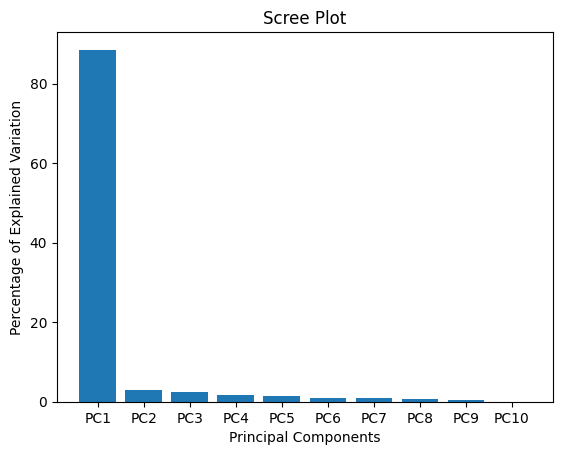

In [47]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained Variation")

In [48]:
pca_df = pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wild_Type_1,-9.135875,0.732662,-0.404285,-1.334401,2.466340,1.006174,-0.268959,0.650293,0.497807,-1.897938e-15
wild_Type_2,-9.504279,-0.802228,1.058372,-1.292270,-1.564130,-1.503107,-0.691373,0.805986,0.619931,-2.552487e-15
wild_Type_3,-9.264621,-1.205076,-0.019424,1.062124,1.226718,-1.277303,-0.719384,-0.853606,-1.072571,-2.488303e-15
wild_Type_4,-9.409437,3.178201,-0.967094,2.029651,-1.012787,0.401862,-0.105792,-0.328106,0.458696,-1.570448e-15
wild_Type_5,-9.714128,-1.814188,0.303273,-0.507339,-1.057430,1.359269,1.746825,-0.284153,-0.517018,-1.675652e-15


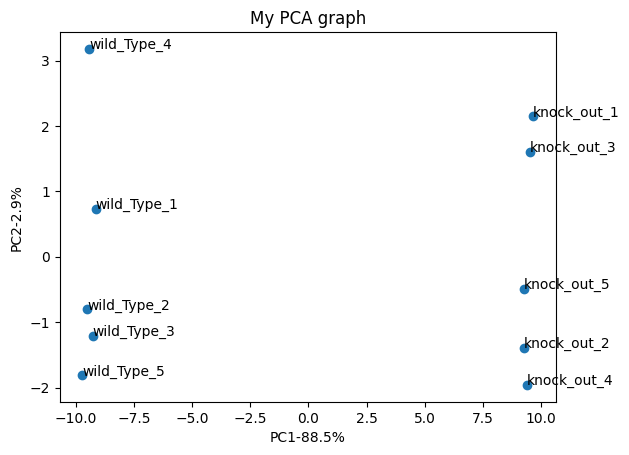

In [50]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA graph')
plt.xlabel(f"PC1-{per_var[0]}%")
plt.ylabel(f"PC2-{per_var[1]}%")
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

In [51]:
loading_score = pd.Series(pca.components_[0],index=genes)

In [52]:
loading_score

gene1     -0.088695
gene2      0.105933
gene3      0.106218
gene4     -0.082628
gene5     -0.105325
             ...   
gene96    -0.099873
gene97     0.101440
gene98     0.106199
gene99    -0.105480
gene100   -0.106230
Length: 100, dtype: float64

In [53]:
sorted_loading_score = loading_score.sort_values(ascending=False)

In [54]:
top_10_genes = sorted_loading_score[0:10].index.values

In [56]:
loading_score[top_10_genes]

gene90    0.106264
gene3     0.106218
gene29    0.106209
gene18    0.106203
gene98    0.106199
gene24    0.106195
gene91    0.106141
gene55    0.106139
gene8     0.106128
gene52    0.106105
dtype: float64